<ipython-input-2-a9c4fd0451b0>:15: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dataset["Date"] = pd.to_datetime(dataset["Date"])
<ipython-input-2-a9c4fd0451b0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Date"] = pd.to_datetime(dataset["Date"])


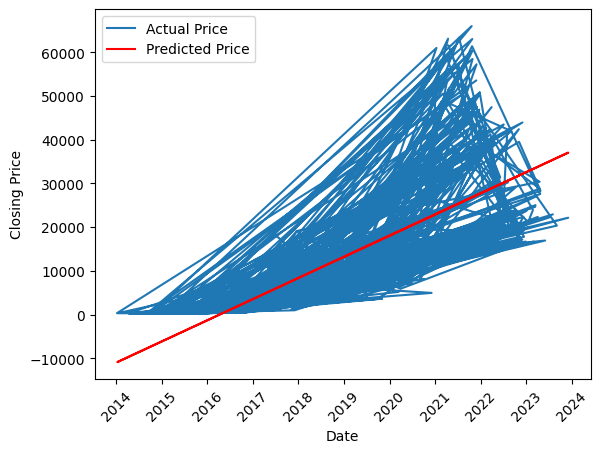

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# load the data
df = pd.read_csv("BTC-USD.csv")

# extract the relevant columns
dataset = df[["Date", "Close"]]

# convert the date column to datetime format
dataset["Date"] = pd.to_datetime(dataset["Date"])
# dataset["Date"] = pd.to_datetime(dataset["Date"], format="%d/%m/%Y")

# split the data into training and testing sets
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

# set up the model
model = LinearRegression()

# train the model
train["Date_num"] = pd.to_numeric(train["Date"])
model.fit(train[["Date_num"]], train["Close"])

# make predictions on the testing set
test["Date_num"] = pd.to_numeric(test["Date"])
y_pred = model.predict(test[["Date_num"]])
y_test = test["Close"]

# plot the actual and predicted prices
plt.plot(test["Date"], y_test)
plt.plot(test["Date"], y_pred, color='red')
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.xticks(rotation=45)
plt.legend(["Actual Price", "Predicted Price"])
plt.show()

In [ ]:
# calculate R2 score
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)

R2 score: 0.542863636315347


In [ ]:
# Prepare the input for the next day's prediction
todayDate = dataset["Date"].iloc[-1]
next_day = pd.DataFrame({"Date": [todayDate + pd.DateOffset(days=1)]})
next_day["Date_num"] = pd.to_numeric(next_day["Date"])

# Make a prediction for the next day's price
predicted_price_for_next_day = model.predict(next_day[["Date_num"]])

# Print the predicted price for the next day
print("Predicted price for the next day:", predicted_price_for_next_day[0])

Predicted price for the next day: 34166.17096227952
